# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.7 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [8]:
'''
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
'''

'\nenv_info = env.reset(train_mode=True)[brain_name] # reset the environment\nstate = env_info.vector_observations[0]            # get the current state\nscore = 0                                          # initialize the score\nwhile True:\n    action = np.random.randint(action_size)        # select an action\n    env_info = env.step(action)[brain_name]        # send the action to the environment\n    next_state = env_info.vector_observations[0]   # get the next state\n    reward = env_info.rewards[0]                   # get the reward\n    done = env_info.local_done[0]                  # see if episode has finished\n    score += reward                                # update the score\n    state = next_state                             # roll over the state to next time step\n    if done:                                       # exit loop if episode finished\n        break\n    \nprint("Score: {}".format(score))\n'

When finished, you can close the environment.

In [9]:
#env.close()

### 4. Training our agent
> 1. For this project i choose an algorithm called "DQN". It was introduced in 2015 by Mnih. The purpose of this algorithm is to generate the action values with respect to the agents state. One problem that occurs in reinforcement learning is that both the input and the target change constantly during the process and make training unstable, so this algorithm uses target network and experience replay to stabilize training process.
> 2. The DQN model for this project consist of 3 fc layers. The first two layers has 64 nodes and Relu activation applied to them but the number of nodes in the final layer is equal to the number of actions avaliable.  
> 3. Here we consider the environment to be solved if it has the score or reward greater than 13.

In [5]:
import time
import math
import datetime
import torch                       
from dqn_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
agent = Agent(state_size=37, action_size=4, seed=0)

In [7]:
def dqn(n_episodes=2000, eps_start=0.99, eps_end=0.01, eps_decay = .996, train_numb = 0):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []             
    scores_window = deque(maxlen=100)       
    eps = eps_start             

    for i_episode in range(1, n_episodes+1):       
        env_info = env.reset(train_mode = True)[brain_name]
        state = env_info.vector_observations[0]     
        score = 0                       
        max_time_steps = 1000   
        for t in range(max_time_steps):                                    
            action = agent.act(state,eps)                                     
            env_info = env.step(action)[brain_name]        
            next_state = env_info.vector_observations[0]   
            reward = env_info.rewards[0]                   
            done = env_info.local_done[0]                  
            agent.step(state,action,reward,next_state, done) 
            score += reward                                
            state = next_state                             
            if done:                                       
                break                                      
        scores_window.append(score)                        
        scores.append(score)
        
        eps = max(eps_end,eps_decay*eps)                   
        
        count = 0                                          
        for j in range(len(scores_window)):                
            if scores_window[j] >= 13:
                count+=1
                
        
        
        print('\rEpisode: {},  Avg.Score: {:.2f},  score {}, How many scores >= 13: {}, eps.: {:.2f}'. \
            format(i_episode, np.mean(scores_window), score, count, eps), end="") 
        if np.mean(scores_window) >=13:  
            print('\nEnvironment solved in {: d} episodes!\tAverage Score: {: .2f}'.format(i_episode - 100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'ckpt.pth')
            break
            
     
    return scores

In [8]:
scores = dqn()

Episode: 547,  Avg.Score: 13.02,  score 14.0, How many scores >= 13: 57, eps.: 0.11
Environment solved in  447 episodes!	Average Score:  13.02


### Plot the  scores

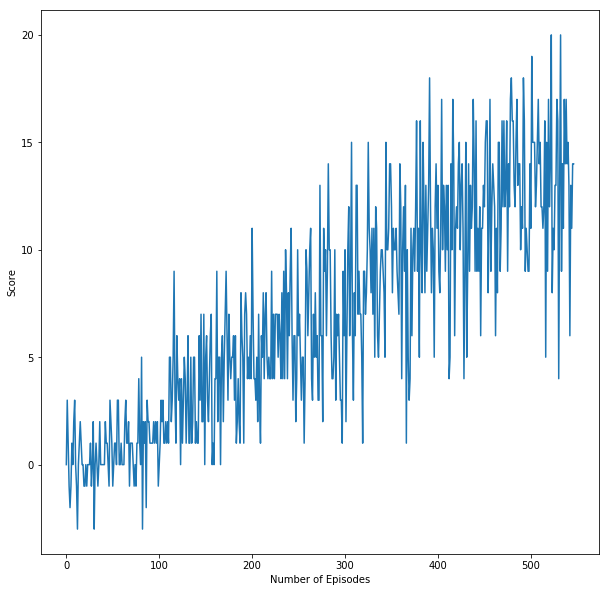

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.show()

In [13]:
env.close()